# Emergence of classical rotation in superfluid Bose-Einstein condensates

[Emergence of classical rotation in superfluid Bose-Einstein condensates](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.93.033601),  
[arXiv:1509.01911](https://arxiv.org/abs/1509.01911)

I will use Rb87 mass which is used in the experiments cited. (Ref. 10 and 11)

[Persistent Currents in Spinor Condensates](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.110.025301) 

[Nonequilibrium Dynamics and Superfluid Ring Excitations in Binary Bose-Einstein Condensates](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.190402)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#import py2gp2d.gp2d_xmds as xmds#
import py_c2bec2d
import py_c2bec2d.gpe_xmds as xmds

## Ideas

- We would like to study the case of selective rotation. One idea is that phase separation could happen with a radial boundary instead of azimuthal ones because the component not coupled to rotation can energetically prefer to stay close to the axis and rotating component can go radially outwards.

- Can the phase separation be driven by rotation? Check the mass imbalanced case. (There should be literature on this.)

In [3]:
from scipy.constants import physical_constants

In [4]:
hbar        = physical_constants['Planck constant over 2 pi'][0]
atomic_mass = physical_constants["atomic mass constant"][0]
hbar,atomic_mass

(1.0545718e-34, 1.66053904e-27)

### Parameters

In [5]:
omega_r = 2*np.pi*30000      # Hz
mRb87   = 86.9*atomic_mass   # kg
r_0     = 0.3e-6             # m
gN      = 1.1564e-41         # (Js)**2/kg 


# length scale 
a_r = np.sqrt(hbar/(mRb87*omega_r))
# ring radius
r0 = r_0/a_r
# dimensionless interaction
g0 = gN/(hbar*omega_r*a_r**2)

# rotation frequanecy about z axis
Ω  = 2*np.pi*1000
# radial trappinf frequency
ωr = 2*np.pi*30000

# dimensionless rotation parameter
Omega = Ω / ωr

print(r0,g0, Omega)

4.818015278157506 150.04607602968233 0.03333333333333333


In [ ]:
omega_r = 2*np.pi*30000 # Hz
r_0 = 0.3e-6 # m
Ng = 1.1564e-41 # (Js)**2/kg
mRb87 = 86.9*1.660539040e-27 # kg
hbar = 1.054571800e-34 # J*s

# length scale 
a_r = np.sqrt(hbar/(mRb87*omega_r))

# ring radius
r0 = r_0 / a_r

print("a_r =", a_r, "r_0/a_r", r0)

# interactions 
g0 = Ng/(hbar*omega_r*a_r**2)

print("Ng/hbar*omega =", g0, 1.01*g0)

print("Omega / omega_r", 1000./30000)

In [6]:
r0

4.818015278157506

In [4]:
xmax=1.9*r0
ymax=1.9*r0
nlat=128
tmax=5

xmds.generate_xmdsfile(xmax=xmax, ymax=ymax, nlat=nlat, tmax=tmax, xmdstol=1.e-8)
xmds.compile_xmds()

xmds file to compile: compile_gpe.xmds
run shell command:  xmds2 compile_gpe.xmds 

xmds2 version 2.2.3 "It came from the deep" (Debian package 2.2.3+dfsg-5)
Copyright 2000-2014 Graham Dennis, Joseph Hope, Mattias Johnsson
                    and the xmds team
Generating source code...
... done
Compiling simulation...
... done. Type './xgpe2d' to run.



In [5]:
xa = np.linspace(-xmax,xmax,nlat+1)[:-1]
ya = np.linspace(-ymax,ymax,nlat+1)[:-1]
sa = np.array([1, 2])

xx, yy, ss= np.meshgrid(xa,ya,sa,indexing='xy')  ### changed the index by 'xy' from 'ij'

r2 = xx**2 + yy**2 
rr = np.sqrt(r2)
σ2 = ss

# initial wavefunction
def fphi0(x,y,s):
    r=np.sqrt(x**2+y**2)
    theta=np.arctan2(y,x)
    return np.exp(-(r-r0)**2/4
                  +1j*(1*(1-s)+1*s)*theta
                  -(np.abs(theta)-(s-1)*np.pi)**2/4)

phi0 = fphi0(xx,yy,ss)
norm2 = np.sum(np.abs(phi0)**2,axis=(0,1))*(xa[1]-xa[0])*(ya[1]-ya[0])
#print(norm2)
phi0[:,:,0] = phi0[:,:,0]/np.sqrt(norm2[0])
phi0[:,:,1] = phi0[:,:,1]/np.sqrt(norm2[1])


# external potential
V_Corbino = 0.5*(rr-r0)**2

saved file 2phi0.h5
saved file 2Vext.h5


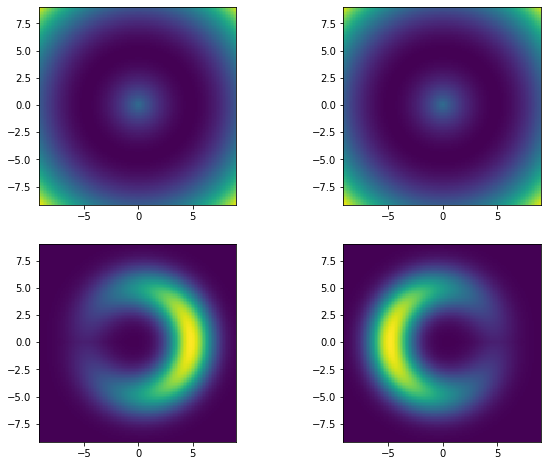

In [6]:
fig, ax = plt.subplots(2,2,figsize=(10,8))

for i in range(2):
    ax[0,i].pcolor(xa,ya,V_Corbino[:,:,i])
    ax[0,i].set_aspect(1.)
    ax[1,i].pcolor(xa,ya,np.abs(phi0[:,:,i]))
    ax[1,i].set_aspect(1.)

    
xmds.save_complex_func_as_h5(xa, ya, sa, phi0, file_name="2phi0.h5")
xmds.save_real_func_as_h5(xa, ya, sa, V_Corbino, file_name="2Vext.h5")

## Fig. 2b

In [7]:
args= {
      "use_phi0"    : 1, 
      "use_Vext0"   : 1, 
      "use_OOmega2" : 0, 
      "r0"          : r0,
      "N1"          : 1.0,
      "N2"          : 1.0,
      "U11"         : g0,
      "U22"         : g0,
      "U12"         : 1.01*g0,
      "U21"         : 1.01*g0,
      "Omega1"      : 1./30,
      "Omega2"      : 1./30
      }

In [8]:
%%time 
xmds.run_xmds(args_dict=args)

run shell command:  nice -19 ./xgpe2d --use_phi0=1 --use_Vext0=1 --use_OOmega2=0 --r0=4.818015278157506 --N1=1.0 --N2=1.0 --U11=150.04607602968233 --U22=150.04607602968233 --U12=151.54653678997914 --U21=151.54653678997914 --Omega1=0.03333333333333333 --Omega2=0.03333333333333333 

Found enlightenment... (Importing wisdom)
Planning for (x, y) <---> (kx, ky) transform... done.
Planning for (x, y) <---> (kx, ky) transform... done.
Sampled field (for moment group #1) at t = 0.000000e+00
Sampled field (for moment group #2) at t = 0.000000e+00


 Real/Imag. time evolution of a charged two-component BEC: 


Current timestep: 7.484524e-03
Sampled field (for moment group #1) at t = 1.250000e+00
Sampled field (for moment group #2) at t = 1.250000e+00
Current timestep: 7.484461e-03
Sampled field (for moment group #1) at t = 2.500000e+00
Sampled field (for moment group #2) at t = 2.500000e+00
Current timestep: 7.484374e-03
Sampled field (for moment group #1) at t = 3.750000e+00
Sampled field (for 

In [31]:
import sys
sys.path.insert(1,'/home/subasi/xmds-3.0.0/')

In [32]:
outfile="out_gpe2d"
cmdline=('xsil2graphics2 -p '+ outfile+'.xsil')
xmds.run_shell_command(cmdline)

run shell command:  xsil2graphics2 -p out_gpe2d.xsil 

xsil2graphics2 from xmds2 version 3.0.0 "Release the Kraken" (r3071)
Generating output for Python.
Writing import script for 'out_gpe2d.xsil' to 'out_gpe2d.py'.



In [33]:
%run out_gpe2d.py

/home/subasi/xmds-3.0.0/xpdeint/XSILFile.py:156: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  independentVariable['array'] = subgroup[independentVariable['name']].value
/home/subasi/xmds-3.0.0/xpdeint/XSILFile.py:159: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  dependentVariable['array'] = subgroup[dependentVariable['name']].value


<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

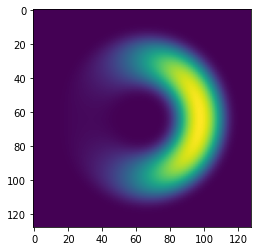

In [36]:
plt.imshow(dens_1[-1,:,:,0]) 

In [21]:
py2gp2d.save_xmds_output(listvariables=True);
out = py2gp2d.get_xmds_output(outfile="out_2gp2d")

shell command:  xsil2graphics2 -p out_2gp2d.xsil 

shell command:  python2 out_2gp2d.py 

0 :  t_1
1 :  x_1
2 :  y_1
3 :  s_1
4 :  phiR_1
5 :  phiI_1
6 :  dens_1
7 :  phase_1
8 :  t_2
9 :  s_2
10 :  norm_2
11 :  LzR_2
12 :  LzI_2
13 :  Lambda_2
14 :  EKE_2
15 :  EEVext_2
16 :  EEintss_2
17 :  EEint10_2
18 :  mmu_2
19 :  EEPhi2_2
20 :  EEtot_2


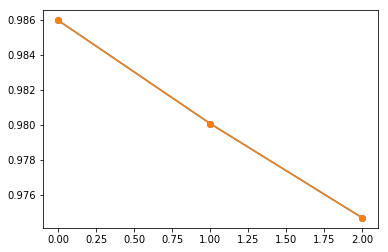

In [22]:
plt.plot(out[11][1:,:],'o-')

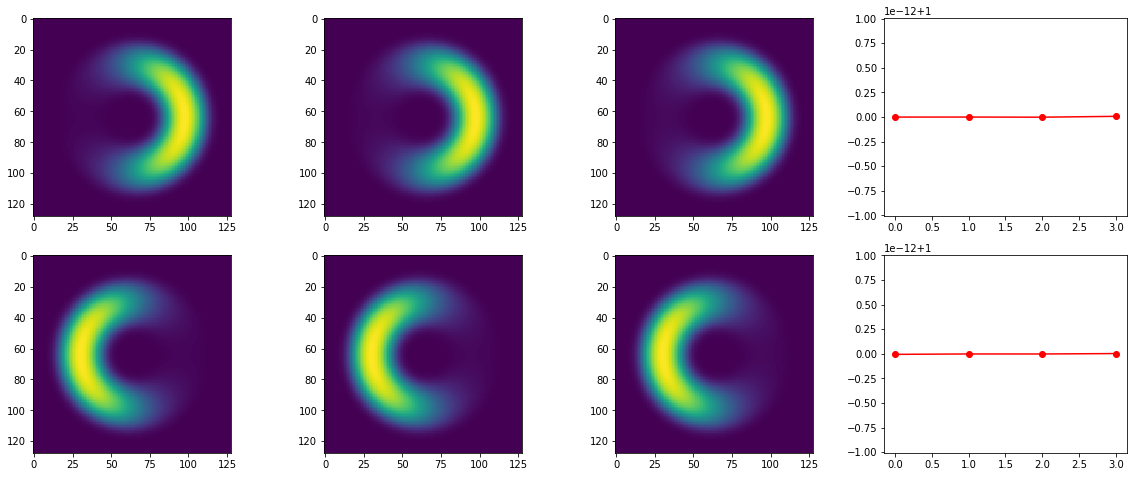

In [23]:
fig, ax = plt.subplots(2,4,figsize=(20,8))

for icomp in range(2):
    ax[icomp,0].imshow(out[6][0 ,:,:,icomp]) # initial state
    ax[icomp,1].imshow(out[6][-2,:,:,icomp]) # at the second last time output
    ax[icomp,2].imshow(out[6][-1,:,:,icomp]) # final state
    ax[icomp,3].plot(out[10][:,icomp],'ro-', label='norm')

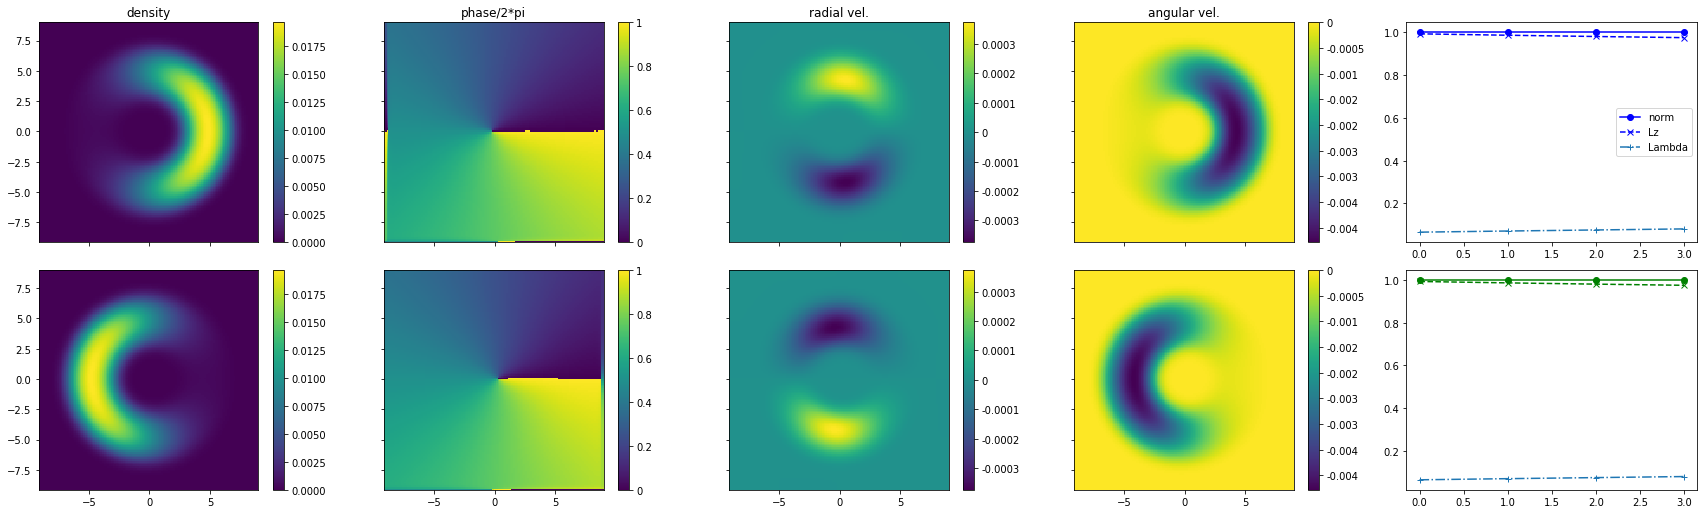

In [24]:
py2gp2d.plot_results(out)

In [13]:
# save the last output as the next input
py2gp2d.save_phi_as_phi0(out)
# go up and run program again if convergence has not been reached

saved file 2phi0.h5


In [14]:
! cp 2phi0.h5 2phi0_busch.h5

## Fig. 2c

In [15]:
%%time 
args["Omega"]=-1.4/30
py2gp2d.run_xmds(args_dict=args)

py2gp2d.save_xmds_output(listvariables=True);
out2 = py2gp2d.get_xmds_output(outfile="out_2gp2d")

shell command:  ./x2gp2d --use_phi0=1 --r0=4.818015278157506 --N0=1.0 --N1=1.0 --Q0=1.0 --Q1=1.0 --U00=150.04607602968233 --U11=150.04607602968233 --U01=151.54653678997914 --U10=151.54653678997914 --Omega=-0.04666666666666666 

shell command:  xsil2graphics2 -p out_2gp2d.xsil 

shell command:  python2 out_2gp2d.py 

0 :  t_1
1 :  x_1
2 :  y_1
3 :  s_1
4 :  phiR_1
5 :  phiI_1
6 :  dens_1
7 :  phase_1
8 :  t_2
9 :  s_2
10 :  norm_2
11 :  LzR_2
12 :  LzI_2
13 :  Lambda_2
CPU times: user 59.9 ms, sys: 16 ms, total: 75.9 ms
Wall time: 1min 30s


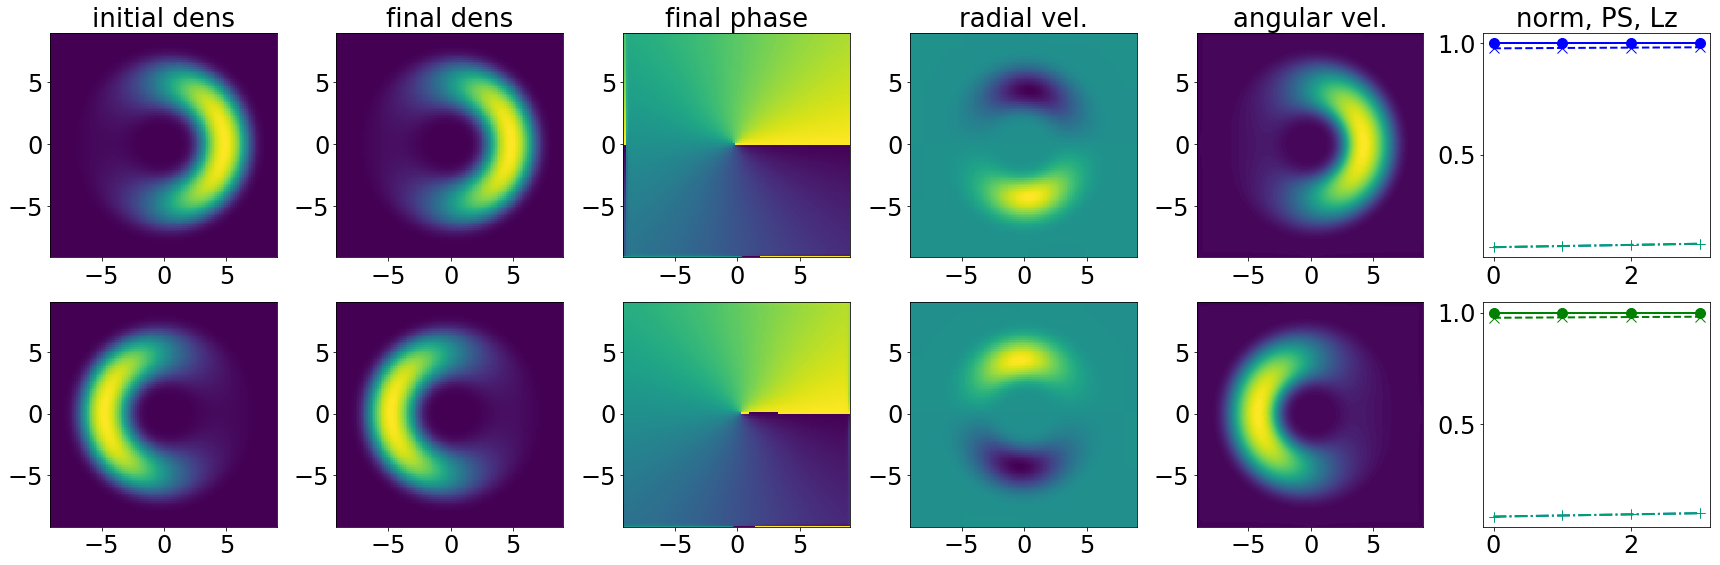

In [16]:
py2gp2d.plot_results(out2)

In [ ]:
plt.plot(out2[11][1:,:],'o-')

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,8))

for icomp in range(2):
    ax[icomp,0].imshow(out2[6][0 ,:,:,icomp]) # initial state
    ax[icomp,1].imshow(out2[6][-2,:,:,icomp]) # at the second last time output
    ax[icomp,2].imshow(out2[6][-1,:,:,icomp]) # final state
    ax[icomp,3].plot(out2[10][:,icomp],'ro-', label='norm')

In [ ]:
# save the last output as the next input
#xmds.save_phi_as_phi0(out)
# go up and run program again if convergence has not been reached